In [8]:
using Pkg
Pkg.activate("../.."); # Actives the environment at the root of the project
# Using our Carbon-I and vSmartMOM packages (developed by our team)

using CairoMakie, DelimitedFiles, Statistics, Interpolations
using Unitful, UnitfulEquivalences
include(joinpath("../../src/Plots", "CI_colorsNew.jl"));
# 1. Load the ggplot theme
#gg = theme_ggplot2()

# 2. Update its font attribute to "Helvetica Condensed Light"
#    (If your system or CairoMakie doesn't recognize the exact name,
#     you might need to specify the full path to the .ttf file.)
#updated_gg = update_theme!(gg, font = "Helvetica")

set_theme!(theme_ggplot2())

  Activating project at `~/code/gitHub/CarbonI`


In [9]:
cloud_fractions = [0.025, 0.05, 0.1, 0.2,0.3];
cbe_σₛ = 3.0
req_σₛ = 4.3

gsd = [303.0u"m", 345.0u"m"]  
grid_size = [100u"km", 100u"km"]

2-element Vector{Quantity{Int64, 𝐋, Unitful.FreeUnits{(km,), 𝐋, nothing}}}:
 100 km
 100 km

In [10]:
N_max = uconvert(NoUnits, prod(grid_size) / prod(gsd))

95661.74008705218

In [11]:
N_eff = N_max .* cloud_fractions

5-element Vector{Float64}:
  2391.5435021763046
  4783.087004352609
  9566.174008705219
 19132.348017410437
 28698.522026115654

In [12]:
# Convert to absolute methane numbers

σₛ = 0.02:0.01:0.07
σₛ_ch4 = σₛ * 1920e-9

3.84e-8:1.92e-8:1.3439999999999999e-7

In [13]:
# Compute conversion factor to go from σₛ to flux uncertainety at 100km (See Section D)
k= 5.8e-11 

5.8e-11

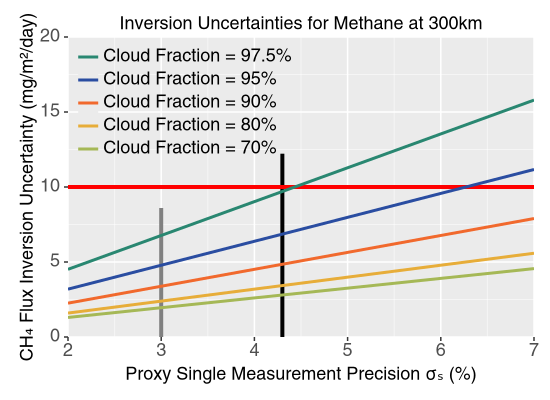

In [14]:
f = Figure(resolution=(550,400), fontsize = 18,  fonts = (; regular = "Helvetica Light", bold="Helvetica"))
#ax = Axis(f[1,1], xlabel="GSD (m)", ylabel="",  title="Impact of GSD on Effective Revisit Time")

ax1 = Axis(f[1, 1], xlabel="Proxy Single Measurement Precision σₛ (%)",ylabel="CH₄ Flux Inversion Uncertainty (mg/m²/day)", title="Inversion Uncertainties for Methane at 300km")


lines!(ax1,  [cbe_σₛ, cbe_σₛ], [0,8.6], color=:gray, linewidth=4 )
lines!(ax1,  [req_σₛ, req_σₛ], [0,12.22], color=:black, linewidth=4 )
lines!(ax1,  [2, 7], [10,10], color=:red, linewidth=4 )

lines!(ax1,  σₛ*100, σₛ_ch4/sqrt(N_eff[1])/k/3, color=CarbonI_colors[3], linewidth=3, label="Cloud Fraction = 97.5%" )
lines!(ax1,  σₛ*100, σₛ_ch4/sqrt(N_eff[2])/k/3, color=CarbonI_colors[4], linewidth=3, label="Cloud Fraction = 95%" )
lines!(ax1,  σₛ*100, σₛ_ch4/sqrt(N_eff[3])/k/3, color=CarbonI_colors[5], linewidth=3, label="Cloud Fraction = 90%" )
lines!(ax1,  σₛ*100, σₛ_ch4/sqrt(N_eff[4])/k/3, color=CarbonI_colors[1], linewidth=3, label="Cloud Fraction = 80%" )
lines!(ax1,  σₛ*100, σₛ_ch4/sqrt(N_eff[5])/k/3, color=CarbonI_colors[2], linewidth=3, label="Cloud Fraction = 70%" )



xlims!(ax1,2.,7)
##ylims!(ax1,0.,0.5)
ylims!(ax1,0.,20)

axislegend(ax1,position = :lt)
save("../../plots/final/FluxTropics.eps",f)
f